In [2]:
import pandas as pd
from nixtla import NixtlaClient
nixtla_client = NixtlaClient(
    api_key = 
)
nixtla_client.validate_api_key()

# Load your dataset
df = pd.read_csv('./data/train_energy.csv')
# Set TimeDate as the index

# # Ensure data is sorted by time
df.DateTime=pd.to_datetime(df.DateTime, infer_datetime_format=True)

df.info
print(df.dtypes)
df.head()

DateTime                  datetime64[ns]
EnergyConsumption(kWh)             int64
dtype: object


C:\Users\PC\AppData\Local\Temp\ipykernel_32172\1964302160.py:13: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df.DateTime=pd.to_datetime(df.DateTime, infer_datetime_format=True)


,DateTime,EnergyConsumption(kWh)
0,2015-11-01 00:00:00,15
1,2015-11-01 01:00:00,13
2,2015-11-01 02:00:00,10
3,2015-11-01 03:00:00,7
4,2015-11-01 04:00:00,9


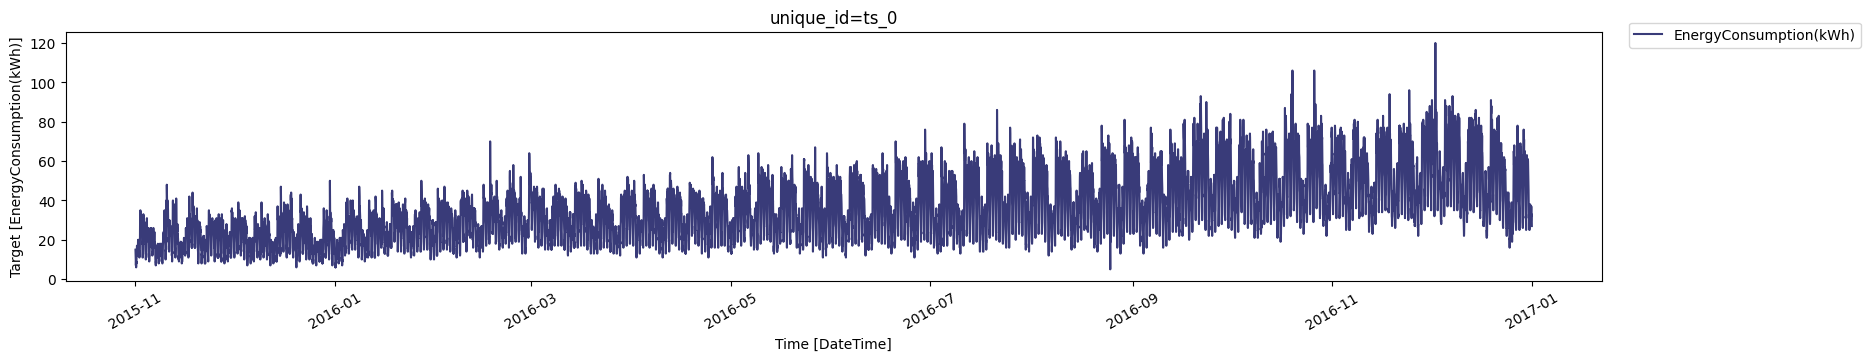

In [3]:
nixtla_client.plot(df, time_col='DateTime', target_col='EnergyConsumption(kWh)')


In [6]:
timegpt_fcst_df = nixtla_client.forecast(df=df, h=8928, time_col='DateTime', target_col='EnergyConsumption(kWh)')
timegpt_fcst_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,DateTime,TimeGPT
0,2017-01-01 01:00:00,26.146576
1,2017-01-01 02:00:00,25.668024
2,2017-01-01 03:00:00,25.527016
3,2017-01-01 04:00:00,24.235378
4,2017-01-01 05:00:00,24.312418


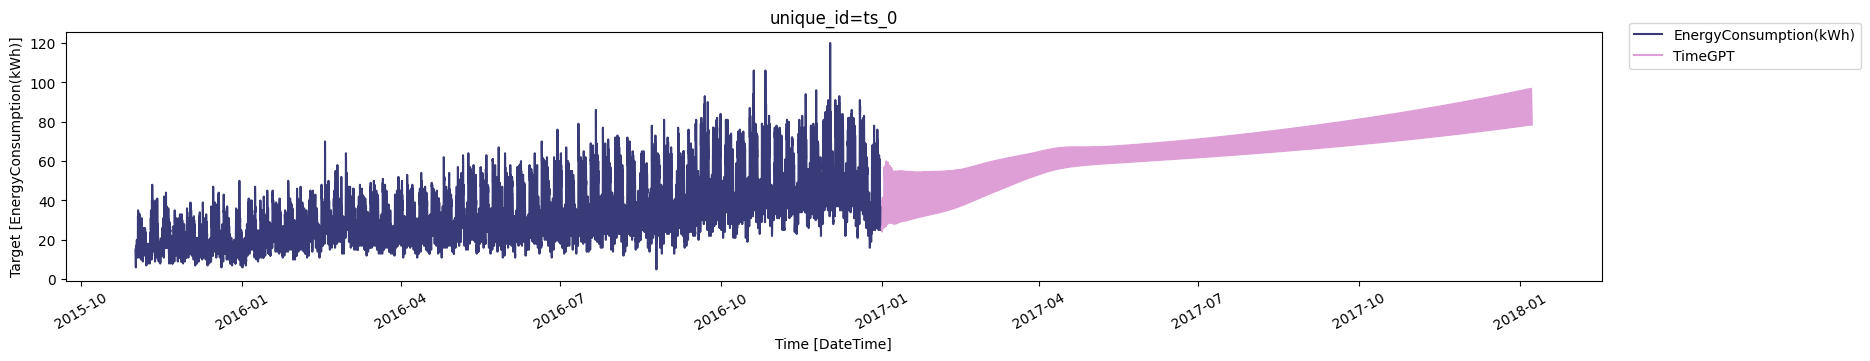

In [7]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='DateTime', target_col='EnergyConsumption(kWh)')
